<h1>Bitcoin price analysis with the MACD indicator</h1>

<h2>Fetch bitcoin historical data</h2

In [1]:
import matplotlib.pyplot as plt
from strategies.macd import get_macd
from datasets.btc_data import get_data
btc_data = get_data()
macd_data = get_macd(btc_data.copy())
print(btc_data)
print(macd_data)

                  unix   symbol      open      high       low     close  \
date                                                                      
2019-06-06  1559779200  BTC/USD   7784.62   7878.62   7449.68   7806.07   
2019-06-07  1559865600  BTC/USD   7801.97   8134.99   7758.93   8001.25   
2019-06-08  1559952000  BTC/USD   8002.68   8061.12   7777.67   7932.27   
2019-06-09  1560038400  BTC/USD   7933.17   7966.58   7511.41   7632.99   
2019-06-10  1560124800  BTC/USD   7629.98   8090.00   7523.16   8021.10   
...                ...      ...       ...       ...       ...       ...   
2022-02-25  1645747200  BTC/USD  38360.93  39727.97  38027.61  39231.64   
2022-02-26  1645833600  BTC/USD  39242.64  40330.99  38600.00  39146.66   
2022-02-27  1645920000  BTC/USD  39146.66  39886.92  37015.74  37712.68   
2022-02-28  1646006400  BTC/USD  37717.10  44256.08  37468.99  43178.98   
2022-03-01  1646092800  BTC/USD  43221.71  43626.49  43185.48  43185.48   

             Volume BTC 

<h2>Bitcoin Chart</h2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


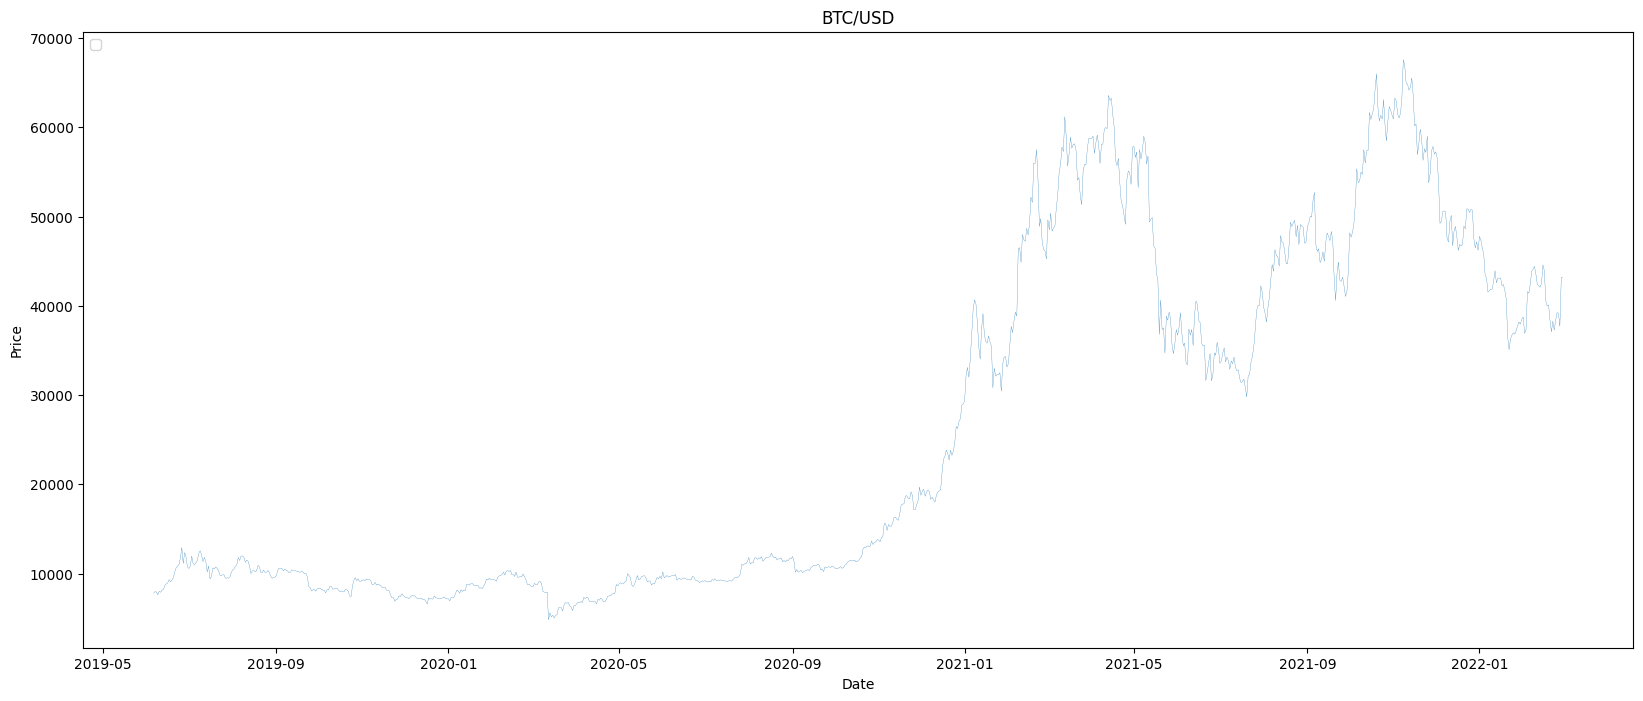

In [2]:
plt.figure(figsize=(20, 8))
plt.plot(btc_data['close'], lw=0.2)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('BTC/USD')
plt.legend(loc='upper left')
plt.show()

<h2>MACD Chart</h2

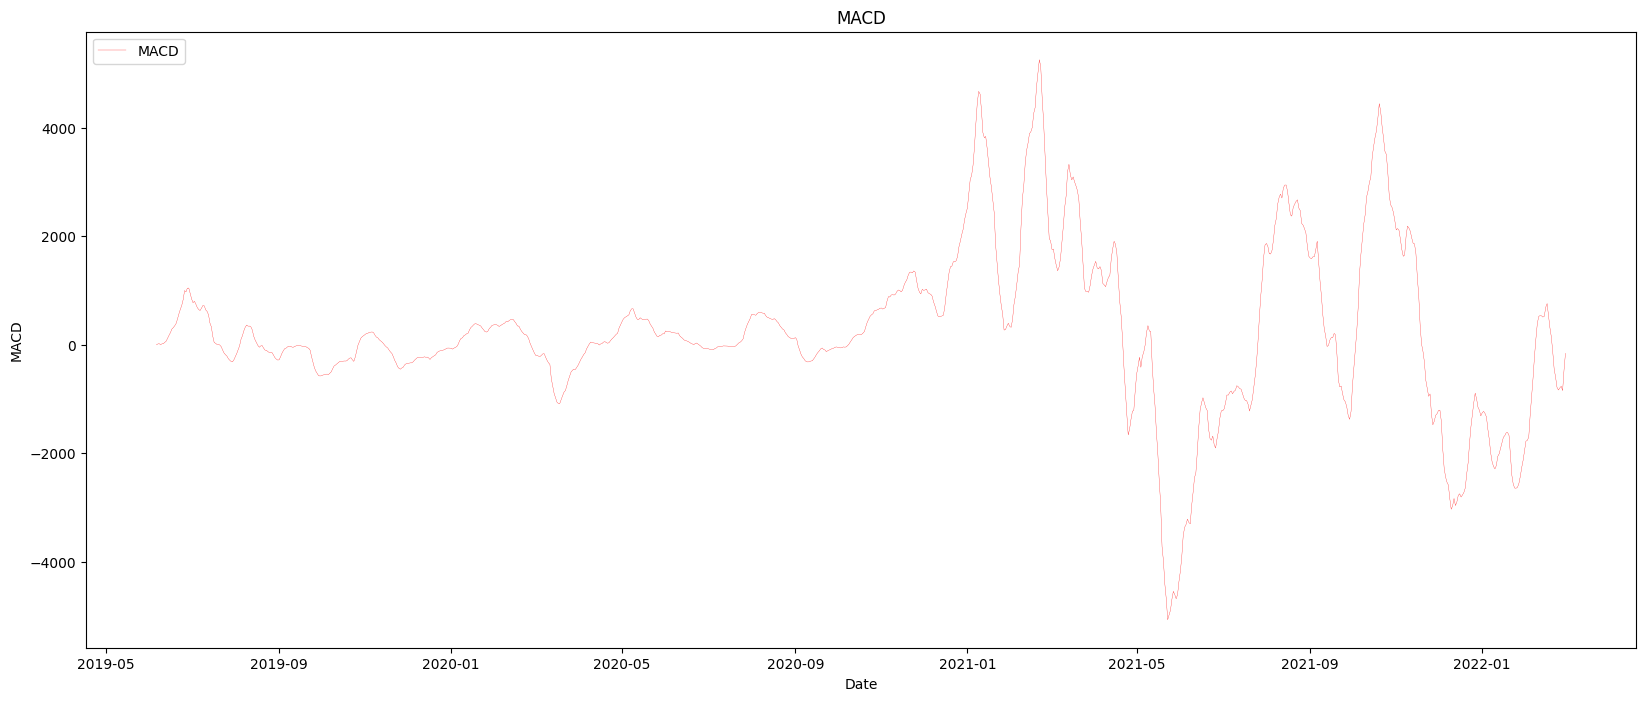

In [3]:
plt.figure(figsize=(20, 8))
plt.plot(macd_data['macd'], label='MACD', color='red', lw=0.2)
plt.xlabel('Date')
plt.ylabel('MACD')
plt.title('MACD')
plt.legend(loc='upper left')
plt.show()

<h2>SIGNAL Chart</h2

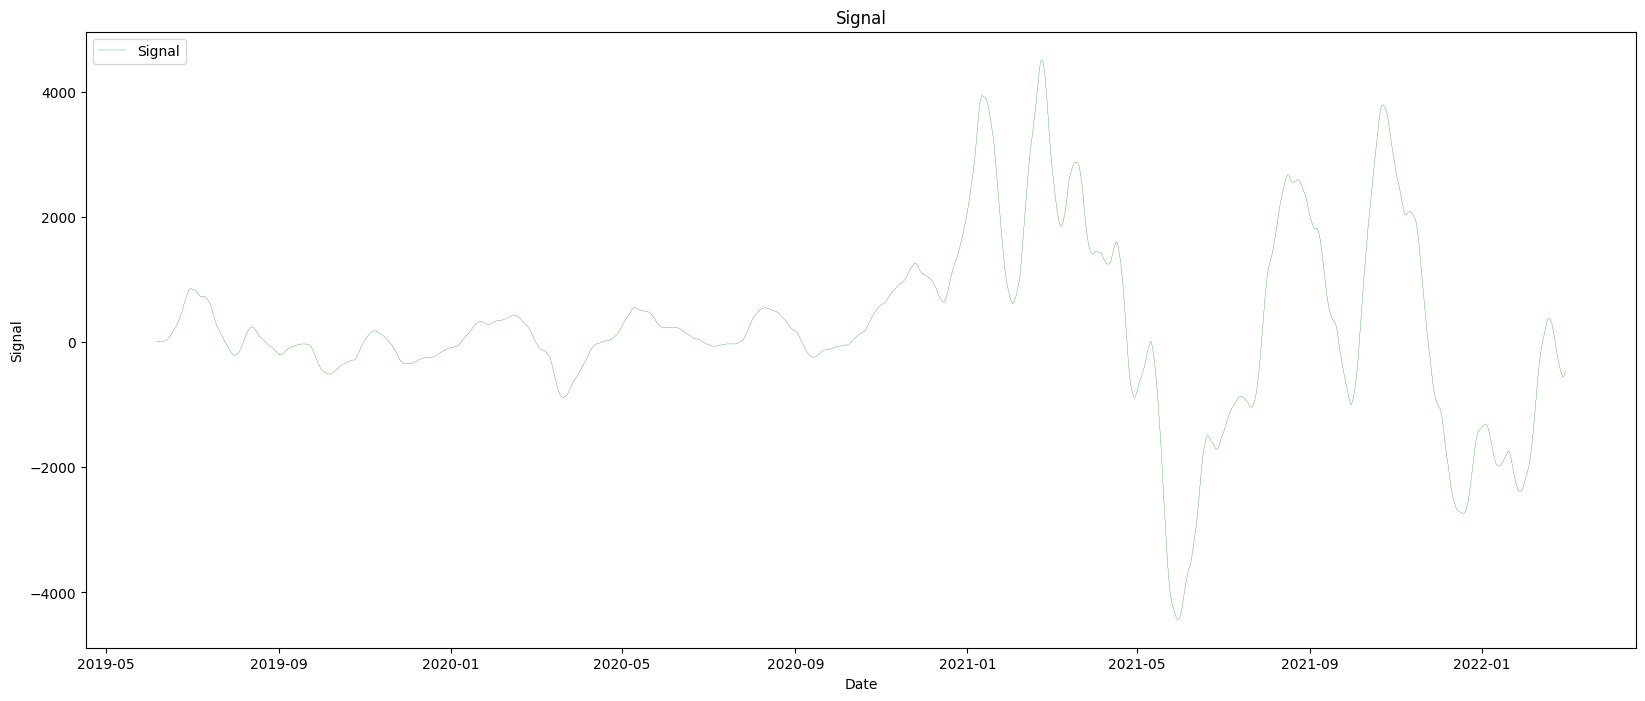

In [4]:
plt.figure(figsize=(20, 8))
plt.plot(macd_data['signal'], label='Signal', color='green', lw=0.2)
plt.xlabel('Date')
plt.ylabel('Signal')
plt.title('Signal')
plt.legend(loc='upper left')
plt.show()

<h2>MACD + SIGNAL Chart</h2

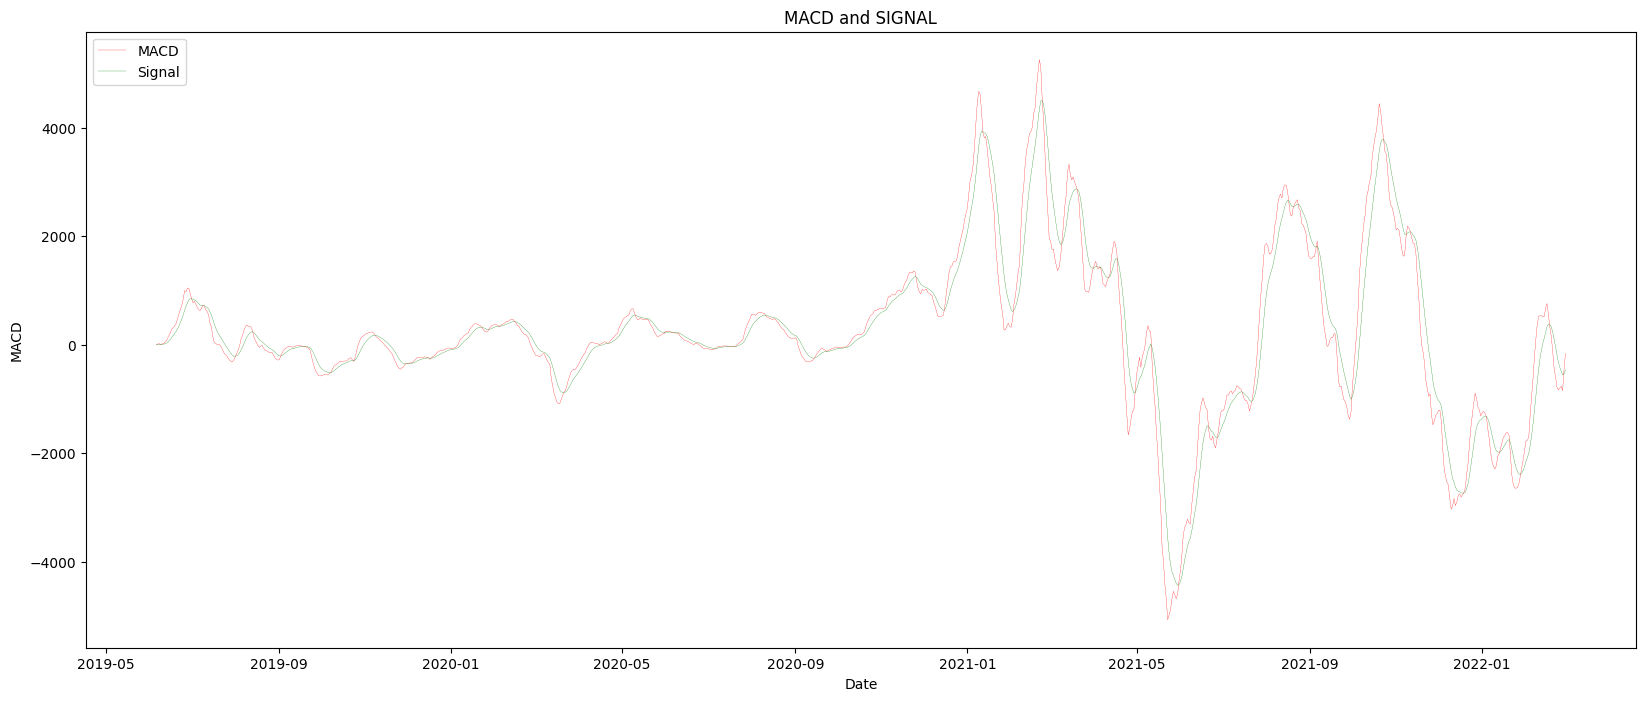

In [5]:
plt.figure(figsize=(20, 8))
plt.plot(macd_data['macd'], label='MACD', color='red', lw=0.2)
plt.plot(macd_data['signal'], label='Signal', color='green', lw=0.2)

plt.xlabel('Date')
plt.ylabel('MACD')
plt.title('MACD and SIGNAL')
plt.legend(loc='upper left')
plt.show()

<h2>MACD Histogram</h2

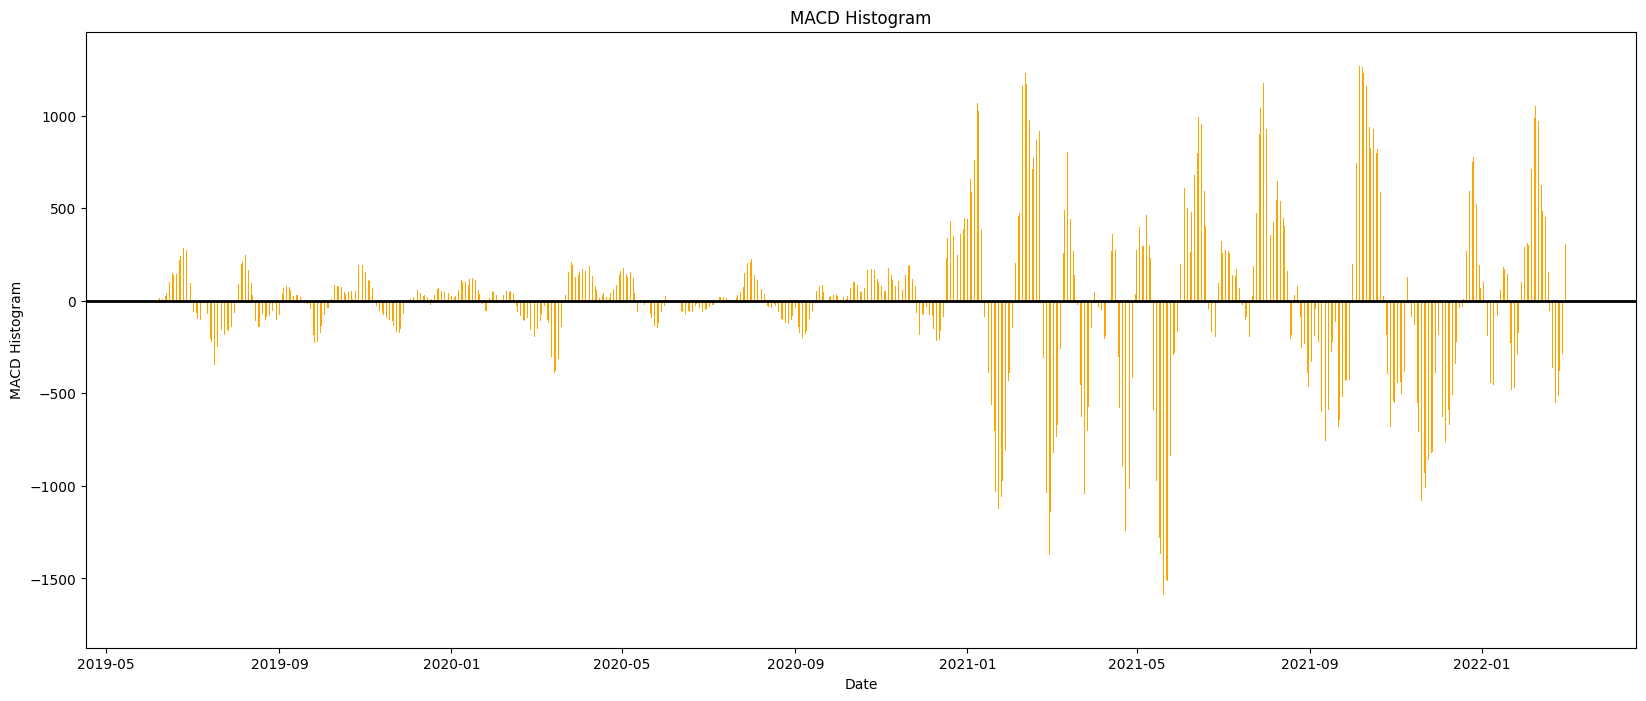

In [6]:
plt.figure(figsize=(20, 8))

plt.bar(macd_data.index, macd_data['histogram'], color='orange', width=0.4)

plt.axhline(0, color='black', lw=2)
plt.xlabel('Date')
plt.ylabel('MACD Histogram')
plt.title('MACD Histogram')
# display the plot
plt.show()

<h2>FULL MACD</h2>

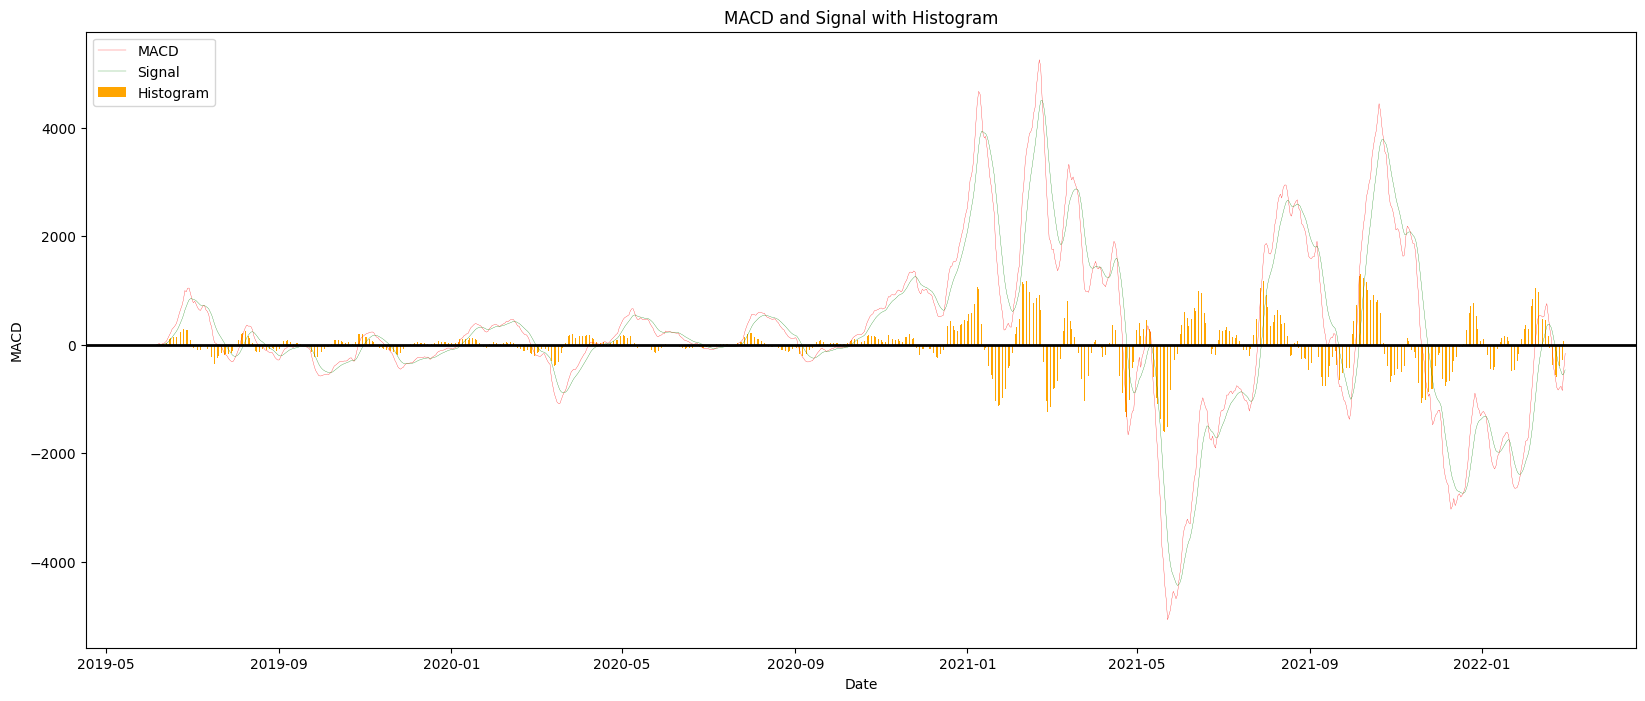

In [7]:

plt.figure(figsize=(20, 8))
plt.plot(macd_data['macd'], label='MACD', color='red', lw=0.2)
plt.plot(macd_data['signal'], label='Signal', color='green', lw=0.2)

plt.bar(macd_data.index, macd_data['histogram'], color='orange', width=0.4, label='Histogram')

plt.axhline(0, color='black', lw=2)

plt.xlabel('Date')
plt.ylabel('MACD')
plt.title('MACD and Signal with Histogram')
plt.legend(loc='upper left')

# display the plot
plt.show()

<h2>BTC + MACD Chart</h2

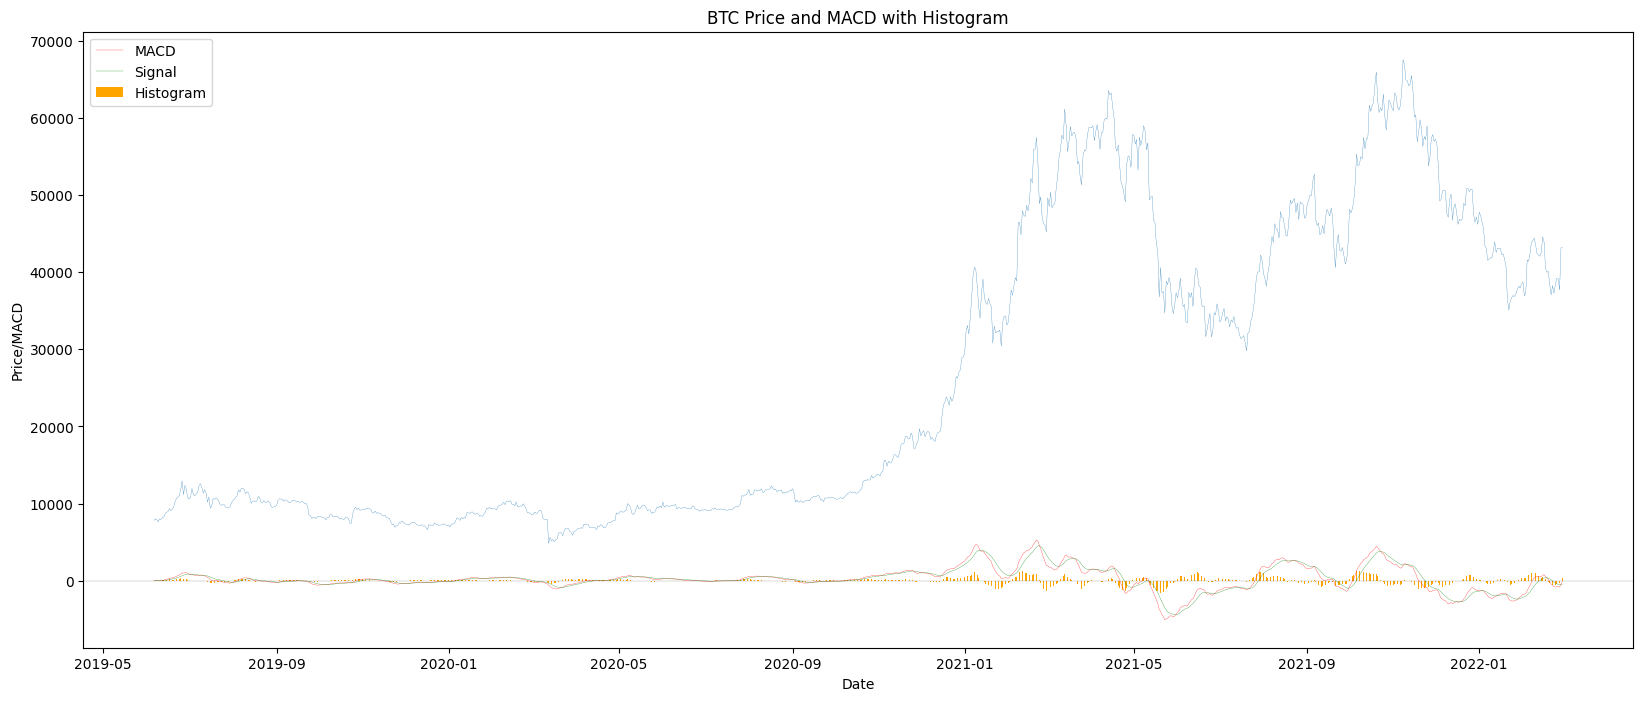

In [8]:

plt.figure(figsize=(20, 8))
plt.plot(btc_data['close'], lw=0.2)
plt.plot(macd_data['macd'], label='MACD', color='red', lw=0.2)
plt.plot(macd_data['signal'], label='Signal', color='green', lw=0.2)

plt.bar(macd_data.index, macd_data['histogram'], color='orange', width=0.4, label='Histogram')

plt.axhline(0, color='black', lw=0.1)

plt.xlabel('Date')
plt.ylabel('Price/MACD')
plt.title('BTC Price and MACD with Histogram')
plt.legend(loc='upper left')

plt.show()

BTC + MACD Chart + EMAs

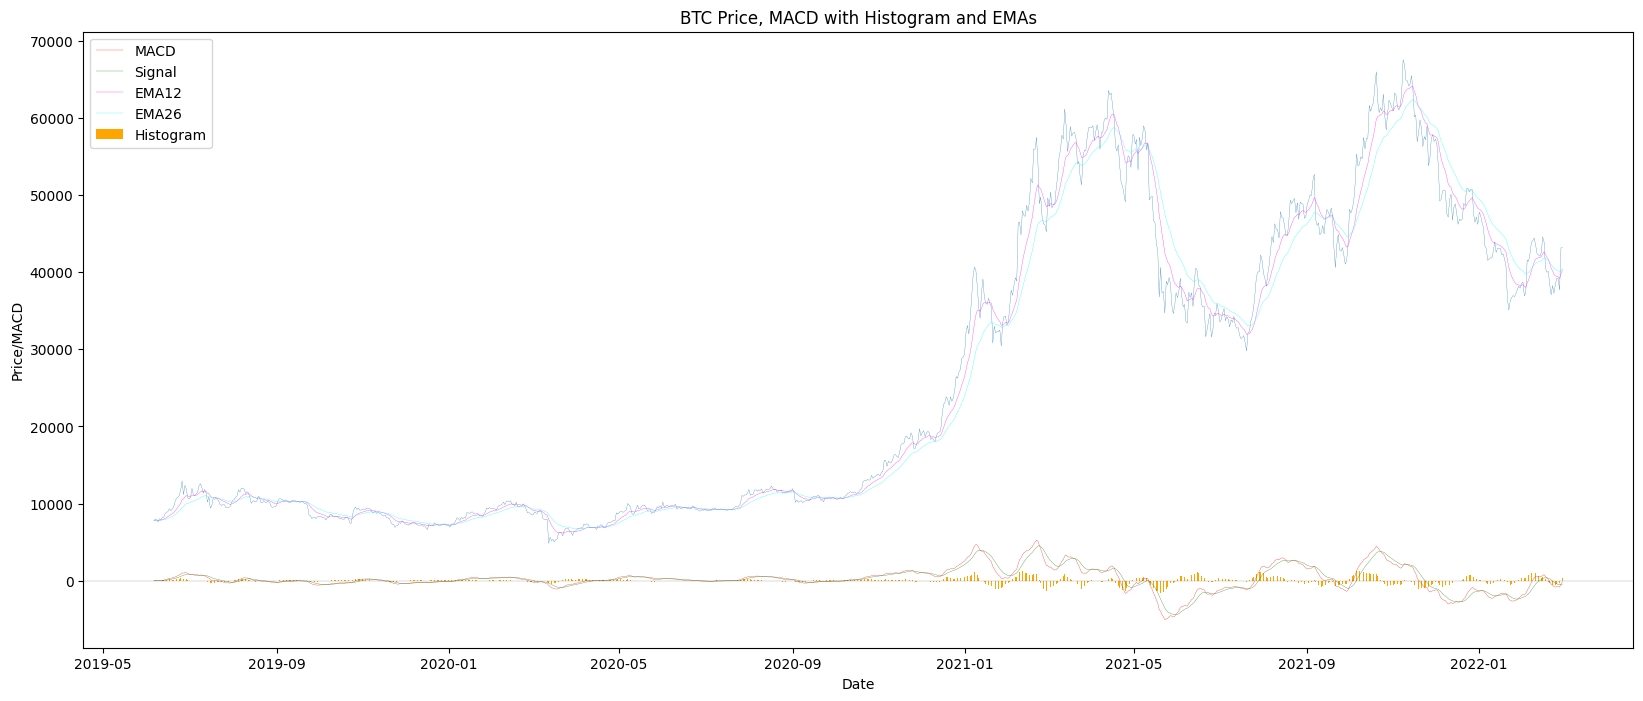

In [9]:
plt.figure(figsize=(20, 8))
plt.plot(btc_data['close'], lw=0.2)
plt.plot(macd_data['macd'], label='MACD', color='red', lw=0.2)
plt.plot(macd_data['signal'], label='Signal', color='green', lw=0.2)
plt.plot(macd_data['ema12'], label='EMA12', color='magenta', lw=0.2)
plt.plot(macd_data['ema26'], label='EMA26', color='cyan', lw=0.2)


plt.bar(macd_data.index, macd_data['histogram'], color='orange', width=0.4, label='Histogram')

plt.axhline(0, color='black', lw=0.1)

plt.xlabel('Date')
plt.ylabel('Price/MACD')
plt.title('BTC Price, MACD with Histogram and EMAs')
plt.legend(loc='upper left')

plt.show()

Backtesting

In [10]:
from backtesting.macd_backtester import MACDTester
macd_tester = MACDTester(macd_data)
total_return = macd_tester.get_total_return()
print(f'Total return: {total_return}$')

Total return: 3174.259551846547$


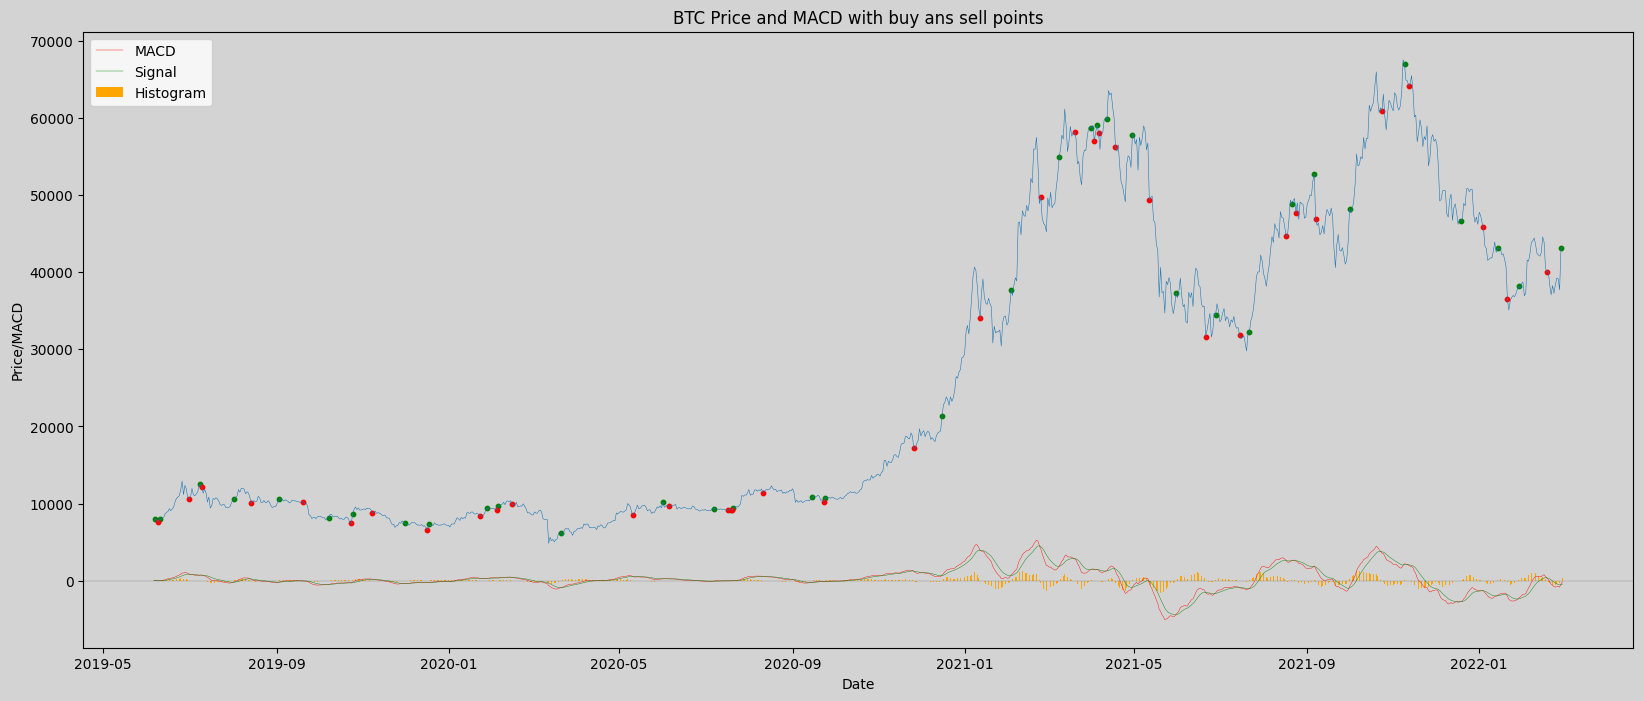

In [11]:
buy_dates = macd_tester.get_buy_dates()
buy_prices = macd_tester.get_buy_prices()
sell_dates = macd_tester.get_sell_dates()
sell_prices = macd_tester.get_sell_prices()

fig, ax = plt.subplots(figsize=(20, 8))

# set the background color of the axes
ax.set_facecolor('lightgray')
fig.set_facecolor('lightgray')
plt.plot(btc_data['close'], lw=0.4)
plt.plot(macd_data['macd'], label='MACD', color='red', lw=0.3)
plt.plot(macd_data['signal'], label='Signal', color='green', lw=0.3)
plt.scatter(buy_dates, buy_prices, color='g', s=10)
plt.scatter(sell_dates, sell_prices, color='r', s=10)

plt.bar(macd_data.index, macd_data['histogram'], color='orange', width=0.4, label='Histogram')

plt.axhline(0, color='black', lw=0.1)

plt.xlabel('Date')
plt.ylabel('Price/MACD')
plt.title('BTC Price and MACD with buy ans sell points')
plt.legend(loc='upper left')

plt.savefig('charts/maccd_backtesting.png')
plt.show()


EMA Optimization

In [12]:
import itertools
from pandas import DataFrame
from backtesting.macd_backtest import backtest_macd

def find_optimal_macd_parameters(data: DataFrame, start_amount: float = 1000) -> tuple:
    best_params = (12, 26)
    best_return = -float('inf')

    first_ema_range = range(5, 30)
    second_ema_range = range(10, 50)

    for params in itertools.product(first_ema_range, second_ema_range):
        first_ema, second_ema = params
        if first_ema == second_ema:
            continue
        macd_data = get_macd(data, first_ema=first_ema, second_ema=second_ema)
        total_return = backtest_macd(macd_data, start_amount=start_amount)
        if total_return > best_return:
            best_return = total_return
            best_params = params

    return best_params

print(find_optimal_macd_parameters(btc_data))

(29, 48)


Optimized EMA parameters

In [13]:
macd_data = get_macd(btc_data, 29, 48)
macd_tester = MACDTester(macd_data)
total_return = macd_tester.get_total_return()
print(f'Total return: {total_return}$')

Total return: 6500.3642335895975$


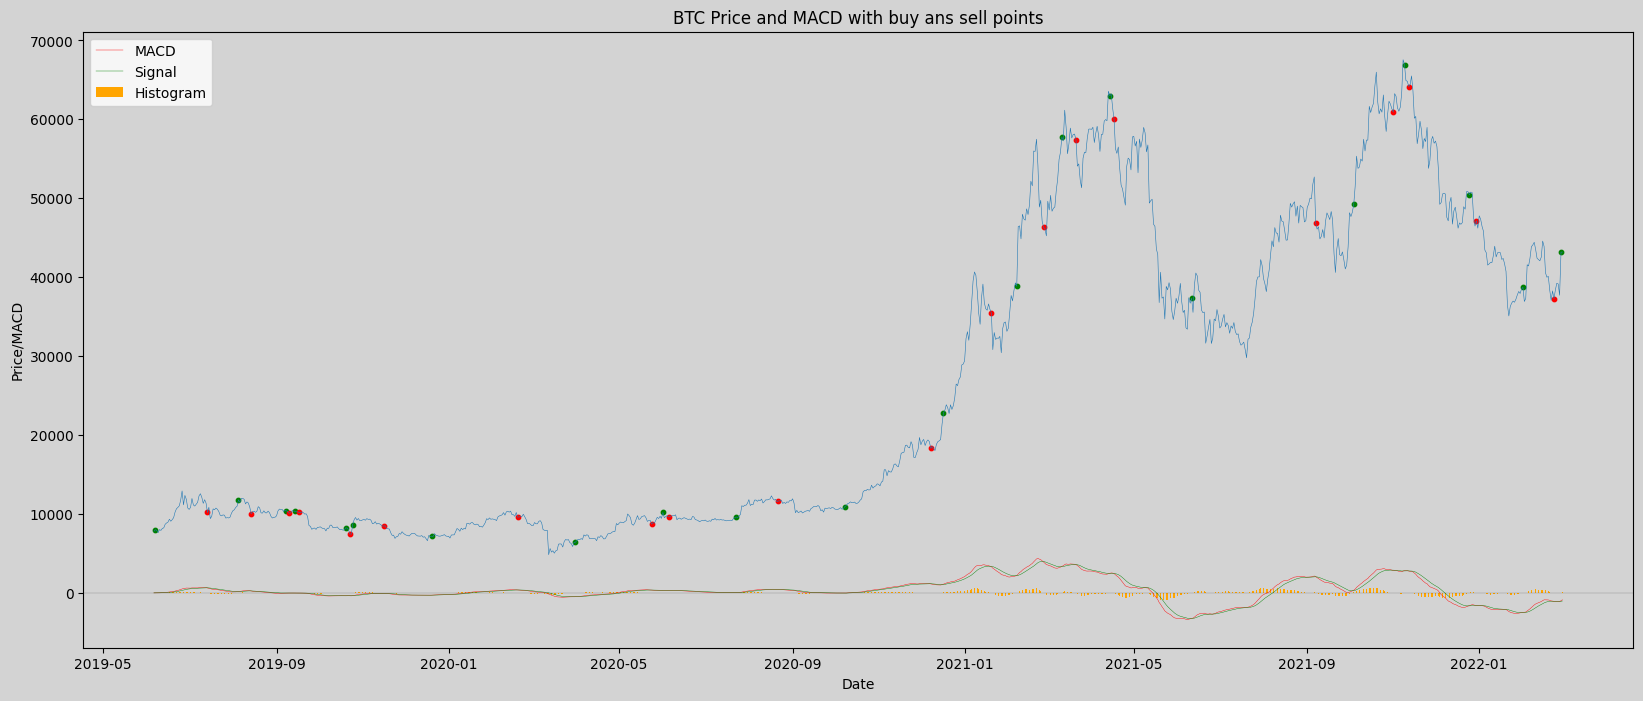

In [14]:
buy_dates = macd_tester.get_buy_dates()
buy_prices = macd_tester.get_buy_prices()
sell_dates = macd_tester.get_sell_dates()
sell_prices = macd_tester.get_sell_prices()

fig, ax = plt.subplots(figsize=(20, 8))

# set the background color of the axes
ax.set_facecolor('lightgray')
fig.set_facecolor('lightgray')
plt.plot(btc_data['close'], lw=0.4)
plt.plot(macd_data['macd'], label='MACD', color='red', lw=0.3)
plt.plot(macd_data['signal'], label='Signal', color='green', lw=0.3)
plt.scatter(buy_dates, buy_prices, color='g', s=10)
plt.scatter(sell_dates, sell_prices, color='r', s=10)

plt.bar(macd_data.index, macd_data['histogram'], color='orange', width=0.4, label='Histogram')

plt.axhline(0, color='black', lw=0.1)

plt.xlabel('Date')
plt.ylabel('Price/MACD')
plt.title('BTC Price and MACD with buy ans sell points')
plt.legend(loc='upper left')

plt.savefig('charts/macd_optimized.png')
plt.show()

Stop Loss

In [15]:
from optimization.stop_loss_optimization import get_optimized_stop_loss
from backtesting.macd_backtester import MACDTester
from datasets.btc_data import get_data
from strategies.macd import get_macd

data = get_data()
macd_data = get_macd(data, 29, 48)
stop_loss = get_optimized_stop_loss(macd_data)
print(stop_loss)
macd_tester = MACDTester(macd_data, stop_loss=stop_loss)
print(macd_tester.get_total_return())

0.19
6762.922230848976


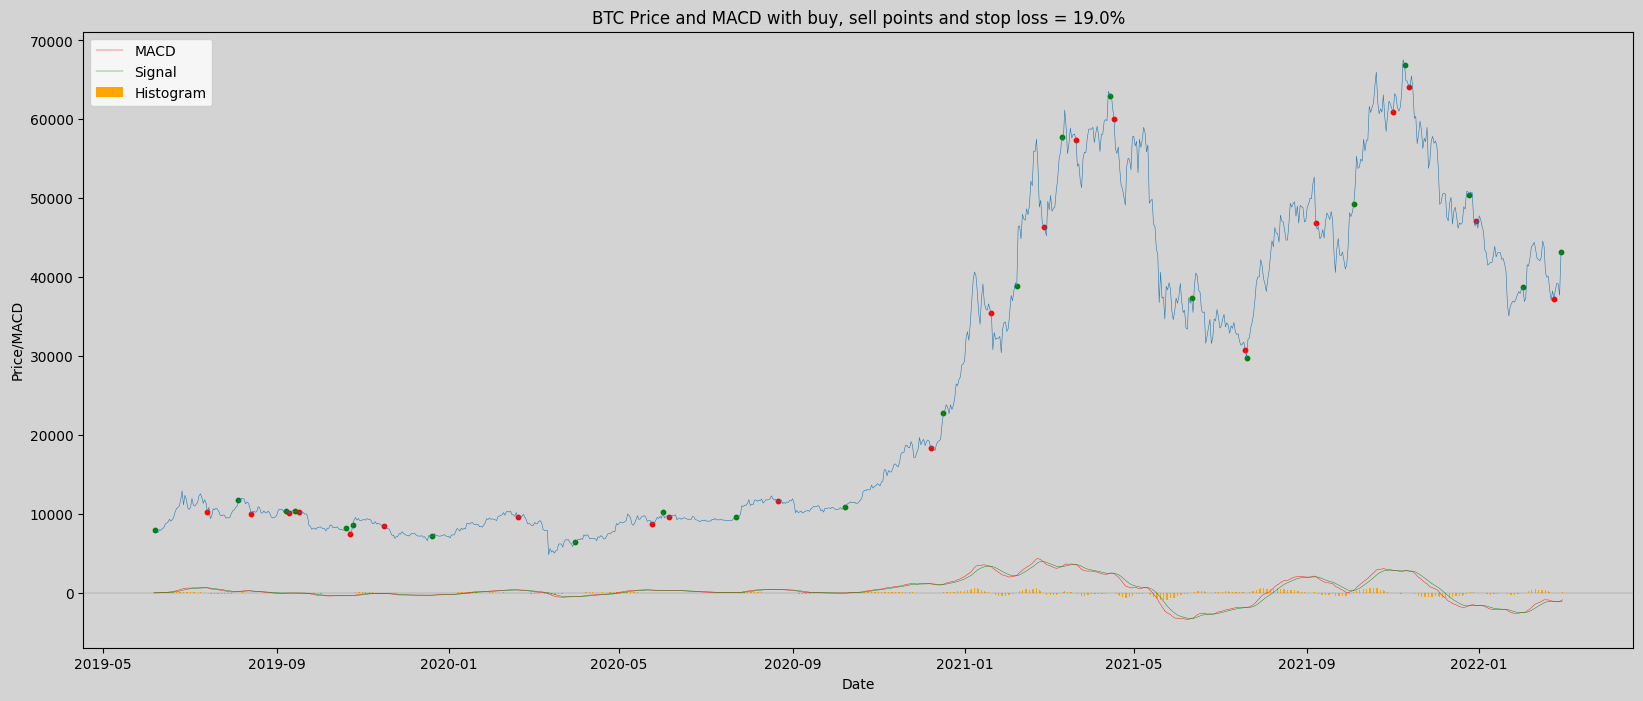

In [16]:
buy_dates = macd_tester.get_buy_dates()
buy_prices = macd_tester.get_buy_prices()
sell_dates = macd_tester.get_sell_dates()
sell_prices = macd_tester.get_sell_prices()

fig, ax = plt.subplots(figsize=(20, 8))

# set the background color of the axes
ax.set_facecolor('lightgray')
fig.set_facecolor('lightgray')
plt.plot(btc_data['close'], lw=0.4)
plt.plot(macd_data['macd'], label='MACD', color='red', lw=0.3)
plt.plot(macd_data['signal'], label='Signal', color='green', lw=0.3)
plt.scatter(buy_dates, buy_prices, color='g', s=10)
plt.scatter(sell_dates, sell_prices, color='r', s=10)

plt.bar(macd_data.index, macd_data['histogram'], color='orange', width=0.4, label='Histogram')

plt.axhline(0, color='black', lw=0.1)

plt.xlabel('Date')
plt.ylabel('Price/MACD')
plt.title(f'BTC Price and MACD with buy, sell points and stop loss = {stop_loss * 100}%')
plt.legend(loc='upper left')

plt.savefig('charts/macd_optimized_with_stop_loss.png')
plt.show()